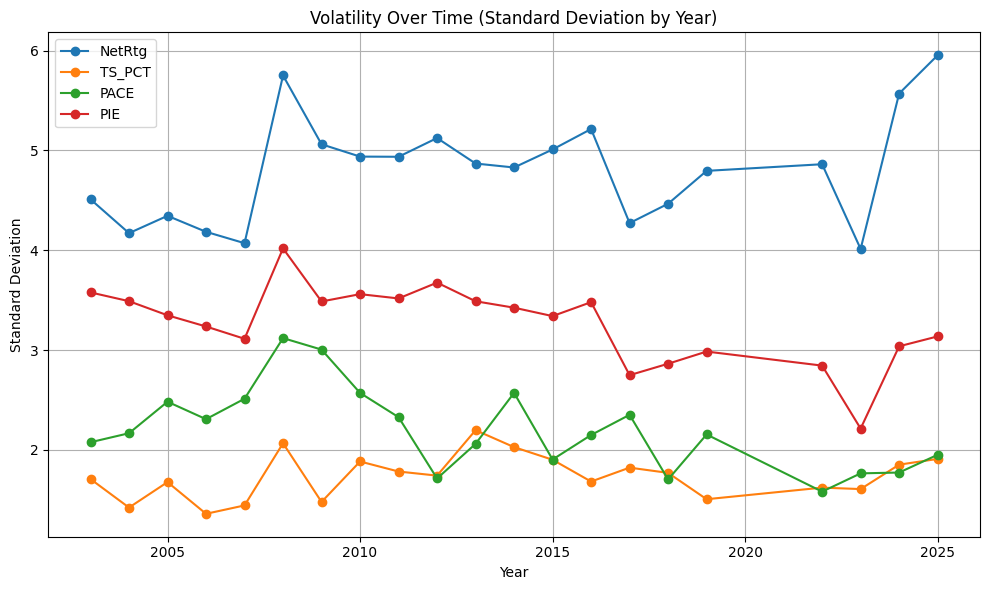

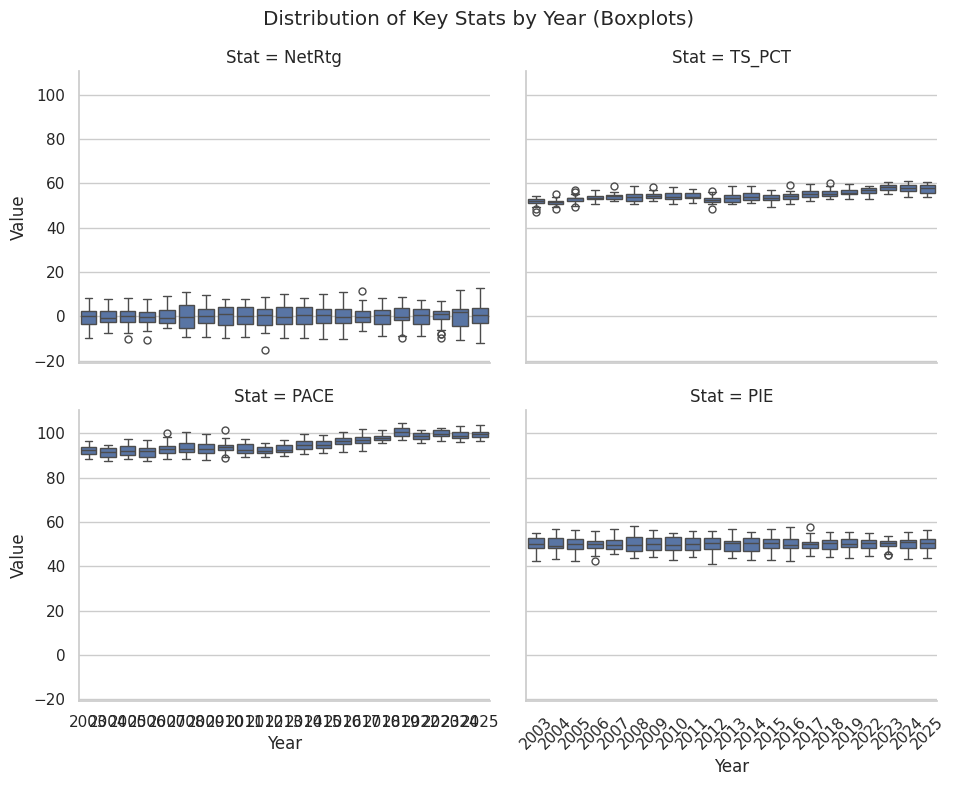

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Placeholder paths
team_stats_path = '/workspaces/Data-Science-Final-Project/NBA/data/official_team_advanced_stats.csv'

# Load and clean data
df = pd.read_csv(team_stats_path)
df['Year'] = df['Year'].astype(int)
df['POSS'] = df['POSS'].replace(',', '', regex=True).astype(float)

# Remove 2020 season for volatility reasons
df = df[df['Year'] != 2020]

# Select stats to analyze
volatility_stats = ['NetRtg', 'TS_PCT', 'PACE', 'PIE']
std_by_year = df.groupby('Year')[volatility_stats].std().reset_index()
std_by_year.columns = ['Year'] + [stat + '_STD' for stat in volatility_stats]

# Plot standard deviation trends
plt.figure(figsize=(10, 6))
for stat in [col for col in std_by_year.columns if '_STD' in col]:
    plt.plot(std_by_year['Year'], std_by_year[stat], marker='o', label=stat.replace('_STD', ''))
plt.title("Volatility Over Time (Standard Deviation by Year)")
plt.xlabel("Year")
plt.ylabel("Standard Deviation")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplots for Net Rating, TS%, PACE, PIE
melted_df = df.melt(id_vars='Year', value_vars=volatility_stats, var_name='Stat', value_name='Value')
sns.set(style="whitegrid")
g = sns.catplot(data=melted_df, x="Year", y="Value", col="Stat", col_wrap=2, kind="box", height=4, aspect=1.2)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Key Stats by Year (Boxplots)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


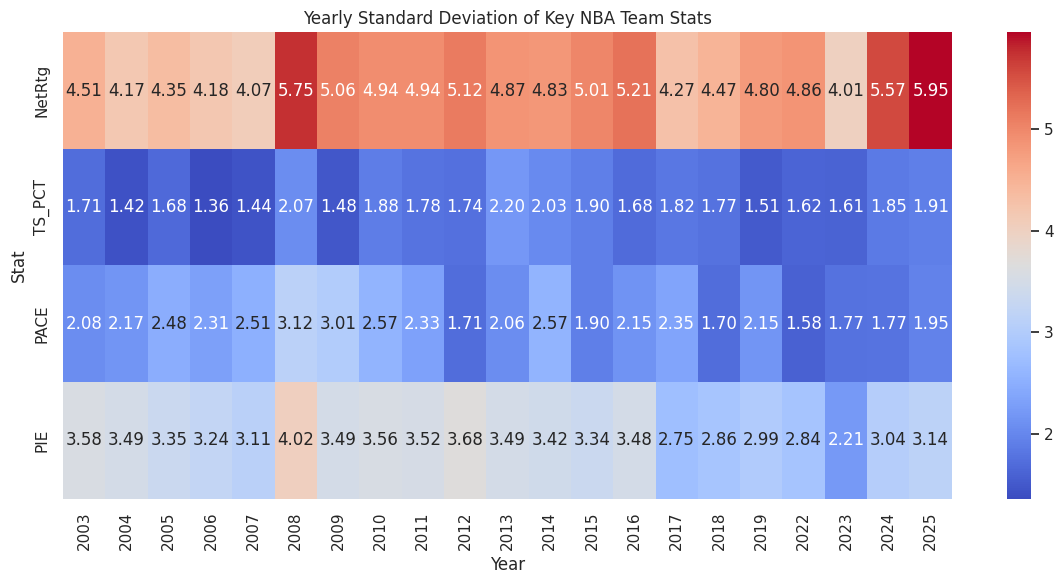

In [5]:
# Group by year and calculate standard deviation
std_by_year = df.groupby('Year')[['NetRtg', 'TS_PCT', 'PACE', 'PIE']].std()

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(std_by_year.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Yearly Standard Deviation of Key NBA Team Stats")
plt.xlabel("Year")
plt.ylabel("Stat")
plt.tight_layout()
plt.show()


In [6]:
std_by_year = df.groupby('Year')[['NetRtg', 'TS_PCT', 'PACE', 'PIE']].std()


In [7]:
print("Standard Deviation of Key Stats by Year:")
print(std_by_year)


Standard Deviation of Key Stats by Year:
        NetRtg    TS_PCT      PACE       PIE
Year                                        
2003  4.510538  1.708188  2.076994  3.577767
2004  4.171472  1.422609  2.167241  3.489890
2005  4.345028  1.677765  2.482736  3.348633
2006  4.184861  1.360206  2.308116  3.236423
2007  4.070985  1.444056  2.512543  3.113257
2008  5.750646  2.066762  3.120020  4.018555
2009  5.061667  1.478956  3.005006  3.487093
2010  4.938287  1.884141  2.571035  3.560376
2011  4.936535  1.783591  2.328191  3.517394
2012  5.124206  1.742666  1.713882  3.675917
2013  4.868865  2.197700  2.060672  3.489195
2014  4.829113  2.028079  2.571594  3.424751
2015  5.009641  1.901675  1.903887  3.340514
2016  5.214300  1.683213  2.149484  3.480199
2017  4.272317  1.822579  2.351778  2.748937
2018  4.466040  1.770135  1.704406  2.863406
2019  4.795395  1.506236  2.154909  2.985451
2022  4.861796  1.622277  1.582043  2.844638
2023  4.013116  1.607901  1.765200  2.213825
2024  5.570023